# IESB - Miner II - Aula 03 - Random Forest

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


# **Importação e visualização dos dados**

In [2]:
# Importando os arquivos
df = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')

df.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
# Verificando o dataframe de treino
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# Verificando o dataframe de teste
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [5]:
# Vamos verificar os dados de treino
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


# **Realizando as transformações nos dados**

<AxesSubplot:ylabel='Frequency'>

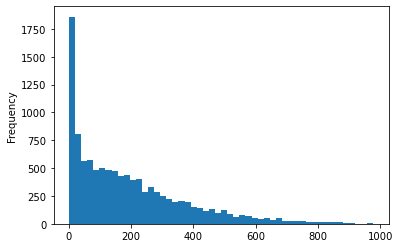

In [6]:
# Verificando a distribuição da variável count
df['count'].plot.hist(bins=50)

In [7]:
# Valor máximo de count
df['count'].max()

977

In [8]:
# Valor mínimo de count
df['count'].min()

1

In [9]:
# Aplicar log na variavel de resposta
df['count'] = np.log(df['count'])

<AxesSubplot:ylabel='Frequency'>

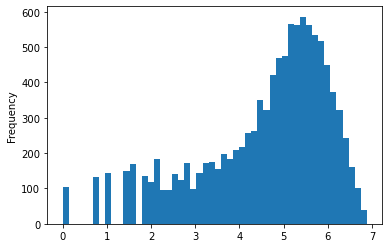

In [10]:
# Verificando novamente a distribuição da variável count
df['count'].plot.hist(bins=50)

In [11]:
# Visualizando os dados
df.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.840000,9.020000,9.020000,9.840000,9.840
atemp,14.395000,13.635000,13.635000,14.395000,14.395
humidity,81,80,80,75,75
windspeed,0.000000,0.000000,0.000000,0.000000,0.000
casual,3,8,5,3,0


In [12]:
# Juntando os dataframes
df = df.append(test)

In [13]:
# Convertendo a coluna datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [14]:
# Verificando se funcionou
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 1.7 MB


# **Feature Engineering**

In [15]:
# Criando novas colunas com a data e hora
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] =  df['datetime'].dt.day
df['dayofweek'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour

# **Separando os dataframes**

In [16]:
# Primeiro o dataframe de  teste
test = df[df['count'].isnull()]

In [17]:
# Depois o dataframe de  teste
df = df[~df['count'].isnull()]

In [18]:
# Verificando tamanhos
df.shape, test.shape

((10886, 17), (6493, 17))

# **Dividindo o dataframe de treino**

In [19]:
# Importando o metodo do scikitlearn para divisao
from sklearn.model_selection import train_test_split

In [20]:
# Dividir a base de treino
train, valid = train_test_split(df, random_state=42)

In [21]:
# verificando tamanhos
train.shape, valid.shape

((8164, 17), (2722, 17))

# **Selecionando as colunas que iremos usar como entrada**

In [22]:
# Lista das colunas nao usadas
removed_cols = ['casual', 'registered', 'count', 'datetime']

# Criar a lista das colunas de entrada
feats = [c for c in train.columns if c not in removed_cols]

In [23]:
# Verificando a lista de colunas
feats

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

# **Usando o modelo Random Forest**

In [24]:
# Importando o modelo
from sklearn.ensemble import RandomForestRegressor

In [25]:
# Instanciar o modelo
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [26]:
# Treinando o modelo
rf.fit(train[feats], train['count'])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [27]:
# Fazendo previsões em cima dos dados de validação
preds = rf.predict(valid[feats])

In [28]:
# Verificando as previsoes
preds

array([4.93868774, 2.43922717, 4.98370277, ..., 3.17742994, 4.79387005,
       4.40718919])

In [29]:
# Verificando o real
valid['count'].head(3)

3133    4.844187
5786    2.564949
5224    5.093750
Name: count, dtype: float64

# **Verificando o resultado do modelo com relação a métrica**

In [30]:
# Importando a metrica
from sklearn.metrics import mean_squared_log_error

In [31]:
# Aplicando a metrica
mean_squared_log_error(np.exp(valid['count']), np.exp(preds))**(1/2)

0.2943847069253777

In [32]:
# Vamos prever com base nos dados de treino
# Como o modelo se comporta prevendo em cima de dados conhecidos?
train_preds = rf.predict(train[feats])

mean_squared_log_error(np.exp(train['count']), np.exp(train_preds))**(1/2)

0.11406096833785448

# **Gerando as previsões para envio ao Kaggle**

In [33]:
# Gerando as previsões para envio ao Kaggle
test['count'] = np.exp(rf.predict(test[feats]))

In [34]:
# Verificando os dados
test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,13.771313,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,5.451616,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,3.778382,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,2.973952,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,2.191036,2011,1,20,3,4
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013,NaN,NaN,5.082225,2011,1,20,3,5
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013,NaN,NaN,35.545267,2011,1,20,3,6
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013,NaN,NaN,91.665655,2011,1,20,3,7
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012,NaN,NaN,181.340500,2011,1,20,3,8
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013,NaN,NaN,112.293403,2011,1,20,3,9


In [35]:
# Verificando os dados a serem enviados
test[['datetime', 'count']].head()

,datetime,count
0,2011-01-20 00:00:00,13.771313
1,2011-01-20 01:00:00,5.451616
2,2011-01-20 02:00:00,3.778382
3,2011-01-20 03:00:00,2.973952
4,2011-01-20 04:00:00,2.191036


In [36]:
# Gerando o arquivo para submeter ao kaggle
test[['datetime', 'count']].to_csv('rf_novo1.csv', index=False)

# Aumentando a floresta -> 200 arvores aleatórias

In [37]:
# Instanciando um novo modelo
rf2 = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=200,
                           min_samples_leaf=4)

# Treinando o modelo
rf2.fit(train[feats], train['count'])

# Fazendo as previsões na base de validação
preds2 = rf2.predict(valid[feats])

# Aplicando a metrica
mean_squared_log_error(np.exp(valid['count']), np.exp(preds2))**(1/2)

0.2984905828038374

In [38]:
# Gerando novamente as previsões para envio ao Kaggle
test['count'] = np.exp(rf2.predict(test[feats]))

# Gerando o arquivo
test[['datetime', 'count']].to_csv('rf_novo2.csv', index=False)

# Vamos adicionar colunas para obter a média da temperatura, da sensação térmica, da umidade e da velocidade do vento das horas anteriores

In [39]:
# Explicando rolling
df[['datetime', 'temp']].head(10)

,datetime,temp
0,2011-01-01 00:00:00,9.84
1,2011-01-01 01:00:00,9.02
2,2011-01-01 02:00:00,9.02
3,2011-01-01 03:00:00,9.84
4,2011-01-01 04:00:00,9.84
5,2011-01-01 05:00:00,9.84
6,2011-01-01 06:00:00,9.02
7,2011-01-01 07:00:00,8.20
8,2011-01-01 08:00:00,9.84
9,2011-01-01 09:00:00,13.12


In [40]:
# Juntando os dataframes
df = df.append(test)

In [41]:
# Ordenando o dataframe
df.sort_values('datetime', inplace=True)

In [42]:
# Criando a coluna rolling_temp
df['rolling_temp'] = df['temp'].rolling(3, min_periods=1).mean()

In [43]:
# Criando a coluna rolling_atemp
df['rolling_atemp'] = df['atemp'].rolling(3, min_periods=1).mean()

In [44]:
# Criando a coluna rolling_humidity
df['rolling_humidity'] = df['humidity'].rolling(3, min_periods=1).mean()

In [45]:
# Criando a coluna rolling_windspeed
df['rolling_windspeed'] = df['windspeed'].rolling(3, min_periods=1).mean()

In [46]:
# Visualizando os dados
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00,2011-01-01 05:00:00,2011-01-01 06:00:00,2011-01-01 07:00:00,2011-01-01 08:00:00,2011-01-01 09:00:00
season,1,1,1,1,1,1,1,1,1,1
holiday,0,0,0,0,0,0,0,0,0,0
workingday,0,0,0,0,0,0,0,0,0,0
weather,1,1,1,1,1,2,1,1,1,1
temp,9.840000,9.020000,9.020000,9.840000,9.840000,9.840000,9.020000,8.200000,9.840000,13.120000
atemp,14.395000,13.635000,13.635000,14.395000,14.395000,12.880000,13.635000,12.880000,14.395000,17.425000
humidity,81,80,80,75,75,75,80,86,75,76
windspeed,0.000000,0.000000,0.000000,0.000000,0.000000,6.003200,0.000000,0.000000,0.000000,0.000000
casual,3.000000,8.000000,5.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,8.000000


In [47]:
# Separando os dataframes

# Primeiro o teste
test = df[df['casual'].isnull()]

# Depois o treino
df = df[~df['casual'].isnull()]


In [48]:
# Separando em treino e validação
train, valid = train_test_split(df, random_state=42)

In [49]:
# Lista das colunas nao usadas
removed_cols = ['casual', 'registered', 'count', 'datetime']

# Criar a lista das colunas de entrada
feats = [c for c in train.columns if c not in removed_cols]

In [50]:
# Instanciando um novo modelo
rf3 = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=200,
                           min_samples_leaf=4)

# Treinando o modelo
rf3.fit(train[feats], train['count'])

# Fazendo as previsões na base de validação
preds3 = rf3.predict(valid[feats])

# Aplicando a metrica
mean_squared_log_error(np.exp(valid['count']), np.exp(preds3))**(1/2)

0.30131209115538665

In [51]:
# Gerando novamente as previsões para envio ao Kaggle
test['count'] = np.exp(rf3.predict(test[feats]))

# Gerando o arquivo
test[['datetime', 'count']].to_csv('rf_novo3.csv', index=False)